## Human Resources Analytics Project

### Machine Learning.

In [1]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Loading the Dataset from the Data Lake and reading to a Pandas Dataframe.

In [3]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [4]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizing the dataset.

In [5]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [6]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verifying the missing registries.

In [7]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [8]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,technical,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,technical,medium,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [6]:
df = df[:14998]

#### Changing the data types.

In [7]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int64  
 3   number_projects          14998 non-null  int64  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int64  
 7   work_accident            14998 non-null  int64  
 8   left                     14998 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [12]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


In [8]:
df = df[:14998]

#### Renaming attributes.

In [9]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [10]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


###  Feature Importance

#### Converting the categorical features in numerical values to fit the models.

In [11]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [12]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separating target and features.

In [13]:
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

#### Normalizing the data.

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X = scaler.fit_transform(X)

In [17]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

#### Separating in train and test data.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### Training the Decision Tree Classifier model.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [22]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

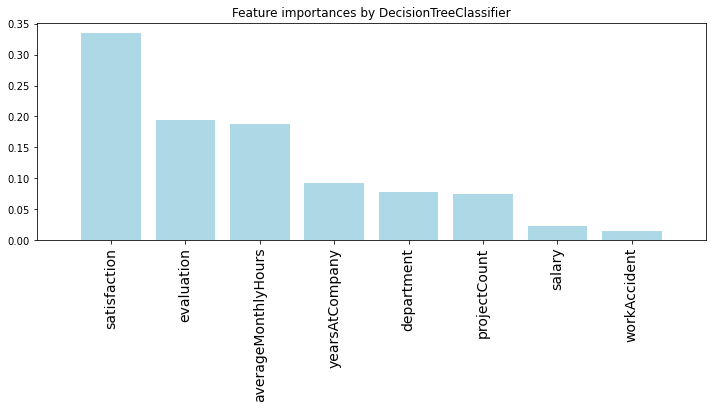

In [23]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtering only the important features.

In [24]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Normalizing.

In [25]:
scaler = MinMaxScaler()

In [26]:
X = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [28]:
X_train

array([[0.59340659, 0.21875   , 0.40449438, 0.125     ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.3956044 , 0.28125   , 0.58426966, 0.125     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.92307692, 0.28125   , 0.46067416, 0.        ],
       [0.51648352, 0.5       , 0.53932584, 0.125     ]])

#### Function of the baseline model.

In [29]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importing methods for metrics evaluation.

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [31]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [32]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Analysis of the baseline model.

In [33]:
y_predict = base_rate_model(X_test)

In [34]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [35]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/home/eduardo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Model.

#### Instantiating the algorithm.

In [36]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Training the model.

In [37]:
logis.fit(X_train, y_train)

LogisticRegression()

#### Calculating the predictions.

In [38]:
y_predict = logis.predict(X_test)

#### Evaluating the results.

In [39]:
accuracy_result(y_test, y_predict)

Accuracy = 0.77


In [40]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5406235985207731

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      2286
           1       0.55      0.11      0.18       714

    accuracy                           0.77      3000
   macro avg       0.66      0.54      0.52      3000
weighted avg       0.72      0.77      0.70      3000



### Decision Tree model.

#### Instantiating the algorithm.

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Training the model.

In [42]:
dtree = dtree.fit(X_train,y_train)

#### Calculating the predictions.

In [43]:
y_predict = dtree.predict(X_test)

#### Evaluating the results.

In [44]:
accuracy_result(y_test, y_predict)

Accuracy = 0.75


In [45]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6717469139886927

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2286
           1       0.48      0.52      0.50       714

    accuracy                           0.75      3000
   macro avg       0.66      0.67      0.67      3000
weighted avg       0.76      0.75      0.75      3000



### Random Forest model.

#### Instantiating the algorithm.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

#### Training the model.

In [48]:
rf = rf.fit(X_train,y_train)

#### Calculating the predictions.

In [49]:
y_predict = rf.predict(X_test)

#### Evaluating the results.

In [50]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [51]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.7243285765749868

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2286
           1       0.68      0.53      0.59       714

    accuracy                           0.83      3000
   macro avg       0.77      0.72      0.74      3000
weighted avg       0.82      0.83      0.82      3000



### Pycaret

In [53]:
#pip install pycaret

#### Importing the methods.

In [52]:
from pycaret.classification import *

#### Defining the setup.

In [54]:
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["yearsAtCompany"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

,Description,Value
0,session_id,2768
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14998, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comparing different models.

In [55]:
best = compare_models(fold = 5,sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8255,0.8074,0.6947,0.6191,0.6545,0.5383,0.5401,0.6880
lightgbm,Light Gradient Boosting Machine,0.8456,0.8027,0.6551,0.6832,0.6686,0.5681,0.5684,0.3440
ada,Ada Boost Classifier,0.8001,0.7997,0.7027,0.5644,0.6257,0.4916,0.4973,0.2600
rf,Random Forest Classifier,0.8179,0.7879,0.5738,0.6289,0.5999,0.4824,0.4833,0.9720
knn,K Neighbors Classifier,0.7436,0.7629,0.6911,0.4735,0.5619,0.3894,0.4035,0.1240
et,Extra Trees Classifier,0.8100,0.7600,0.5430,0.6140,0.5761,0.4543,0.4558,0.6740
qda,Quadratic Discriminant Analysis,0.7248,0.7584,0.7519,0.4531,0.5654,0.3817,0.4080,0.0420
nb,Naive Bayes,0.7136,0.7193,0.5894,0.4264,0.4947,0.3020,0.3098,0.0380
lr,Logistic Regression,0.6776,0.7006,0.6274,0.3899,0.4808,0.2651,0.2809,0.7520
lda,Linear Discriminant Analysis,0.6806,0.6995,0.6230,0.3924,0.4815,0.2675,0.2825,0.0420


#### Creating the model.

In [56]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8395,0.8191,0.7120,0.6485,0.6787,0.5721,0.5732
1,0.8276,0.8259,0.7380,0.6150,0.6709,0.5554,0.5597
2,0.8148,0.7963,0.6660,0.6000,0.6313,0.5080,0.5093
3,0.8252,0.7925,0.6713,0.6227,0.6461,0.5302,0.5309
4,0.8204,0.8032,0.6860,0.6092,0.6453,0.5257,0.5273
Mean,0.8255,0.8074,0.6947,0.6191,0.6545,0.5383,0.5401
Std,0.0083,0.0130,0.0269,0.0165,0.0176,0.0227,0.0231


#### Tunning the model.

In [57]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {
                                      "learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8524,0.8167,0.6640,0.7004,0.6817,0.5857,0.5861
1,0.8505,0.8309,0.6960,0.6824,0.6891,0.5907,0.5907
2,0.8329,0.7896,0.6240,0.6568,0.6400,0.5313,0.5316
3,0.8423,0.7945,0.6353,0.6803,0.6570,0.5548,0.5553
4,0.8323,0.8075,0.6480,0.6480,0.6480,0.5379,0.5379
Mean,0.8421,0.8078,0.6535,0.6736,0.6632,0.5601,0.5603
Std,0.0085,0.0150,0.0251,0.0188,0.0191,0.0243,0.0243


#### Finalizing the model.

In [58]:
final_model = finalize_model(gbc)

In [59]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['yearsAtCompany'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
            

#### Sending the files to the Data Lake.

#### Classification Model.

In [60]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exporting the dataset to the local disk.

In [61]:
df.to_csv("dataset.csv",index=False)

In [62]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)